ابتدا باید کتاب خانه 

nashpy  

را نصب کنیم

In [3]:
!pip install nashpy

با  چند دستور ابتدایی این کتابخانه شروع میکنیم و آنها را توضیح میدهیم ...

در این قسمت هر دو جدول بازیکن سطر وستون با یکدیگر برابر هستند

In [50]:
import nashpy as nash
import numpy as np
A = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
rps = nash.Game(A)
print(rps)

Zero sum game with payoff matrices:

Row player:
[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]

Column player:
[[ 0  1 -1]
 [-1  0  1]
 [ 1 -1  0]]


اگر ماتریس های دو بازیکن با یکدیگر برابر نباشند به صورت زیر میتوانیم انجام دهیم

In [51]:
B =np.array([[1, 0, 1], [1, 1, -1], [-1, 1, -1]])
rps = nash.Game(A, B)
print(rps)

Bi matrix game with payoff matrices:

Row player:
[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]

Column player:
[[ 1  0  1]
 [ 1  1 -1]
 [-1  1 -1]]


برای به دست آوردن یوتیلیتی یک استراتژی از جدول به صورت زیر انجام میدهیم

In [52]:
sigma_r = [0, 0, 1]
sigma_c = [0, 1, 0]
print(rps[sigma_r, sigma_c])

[1 1]


حال میخواهیم با استفاده از این کتابخانه نقطه(نقاط) تعادل نش بازی سنگ کاغذ قیجی را که در قسمت اول دیدید را پیدا کنیم.
یک بار با استفاده از

game.support_enumeration 

و بارهای دیگر با استفاده از 

game.vertex_enumeration , Lemke Howson

کد را پیاده سازی کنید. 
و در پایان با جستجو در اینترنت بگویید که تفاوت عملکرد این سه در جیست و خروجی هر سه را با هم مقایسه کنید.
آیا خروجی یا 

pure strategy 


است یا

 mixed strategy?


In [13]:
#==========================================================================================================#

#   در سنگ کاغذ قیچی Nash Equilibrium بررسی 

In [79]:
RowPlayer =np.array([[0, -1, 1], [1, 0, -1], [-1, 0, 1]])
ColumnPlayer =np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])


#support_enumeration:
game1 = nash.Game(RowPlayer,ColumnPlayer)
eq1 = game1.support_enumeration()
print("game.support_enumeration Method :")
print(list(eq1))
print("")


#vertex_enumeration:
game = nash.Game(RowPlayer, ColumnPlayer)
eq2 = game.vertex_enumeration()
print("game.vertex_enumeration Mehtod :")
print(list(eq2))
print("")

    
#lemke_howson:   
game3 = nash.Game(RowPlayer,ColumnPlayer)
eq3 = game3.lemke_howson(initial_dropped_label=0)
print("game.lemke_howson Mehtod :")
print(list(eq3))


game.support_enumeration Method :
[(array([0.33333333, 0.33333333, 0.33333333]), array([0.33333333, 0.33333333, 0.33333333]))]

game.vertex_enumeration Mehtod :
[(array([0.33333333, 0.33333333, 0.33333333]), array([0.33333333, 0.33333333, 0.33333333]))]

game.lemke_howson Mehtod :
[array([0.33333333, 0.33333333, 0.33333333]), array([0.33333333, 0.33333333, 0.33333333])]


In [14]:
#==========================================================================================================#

In [80]:
eqs = rps.support_enumeration()
list(eqs)

[(array([1., 0., 0.]), array([0., 0., 1.])),
 (array([0., 1., 0.]), array([1., 0., 0.])),
 (array([0., 0., 1.]), array([0., 1., 0.])),
 (array([0.66666667, 0.        , 0.33333333]),
  array([0.        , 0.33333333, 0.66666667]))]

همانطور که میبینیم آخرین دو آرایه آخر ایندکس های غیر صحیح دارند که این دو عبارتند از نقاط تعادل میکس شده .
که همان عبارت احتمالی برای انتخاب استراتژی مورد قبول یک فرد را میدهند.

برای چک کردن این که یک استراتژی بهترین جواب است  از کد زیر استفاده میکنیم.

In [81]:
sigma_r = np.array([0, 1, 0])
sigma_c = np.array([1, 0, 0])
print(rps.is_best_response(sigma_r, sigma_c))

(True, True)



ابتدا درباره مساله 

matching pennies 

تحقیق کنید.
اگر بخواهیم چند بار انتخاب استراتژی انجام بگیرد، کدی بنویسید که تکرار عملیات صورت بگیرد
تعداد تکرار را برابر 2 رد نظر بگیرید. 
ماتریس بازی را نمایش دهید.

In [82]:
import nashpy.repeated_games
MP_GameMatrix = np.array([[1, -1], [-1, 1]])
MP_Game = nash.Game(MP_GameMatrix)
eq_MP = nash.repeated_games.obtain_repeated_game(game=MP_Game, repetitions=2)
eq_MP




Zero sum game with payoff matrices:

Row player:
[[ 2.  2.  2. ...  0. -2. -2.]
 [ 2.  2.  2. ...  0. -2. -2.]
 [ 2.  2.  2. ...  0. -2. -2.]
 ...
 [ 0.  0.  0. ...  2.  0.  2.]
 [-2. -2. -2. ...  0.  2.  0.]
 [-2. -2. -2. ...  2.  0.  2.]]

Column player:
[[-2. -2. -2. ...  0.  2.  2.]
 [-2. -2. -2. ...  0.  2.  2.]
 [-2. -2. -2. ...  0.  2.  2.]
 ...
 [ 0.  0.  0. ... -2.  0. -2.]
 [ 2.  2.  2. ...  0. -2.  0.]
 [ 2.  2.  2. ... -2.  0. -2.]]

حال اگر بخواهیم تعداد تکرار ها را بیشتر کنیم چه؟
برای تکرار های بیشتر این روش محاسبات زیادی میخواهد بجایش از روش های لرنینگ استفاده میکنیم.


در زیر الگوریتم فیکتس

game.fictitious_play

یکی از روش های لرن کردن میباشد.
البته همیشه این الگوریتم همگرا نمیشود 

In [83]:
A = np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]])
B = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]])
game = nash.Game(A, B)
iterations = 10000
np.random.seed(0)
play_counts = tuple(game.fictitious_play(iterations=iterations))
print(play_counts[-1])


[array([5464., 1436., 3100.]), array([2111., 4550., 3339.])]


در مساله فوق اعداد آرایه

play_counts 

باید بر تعداد 

iteration 

تقسیم کنید تا احتمال هر استراتژی بدست بیاید و خروجی را نشان دهید.
و در نهایت احتمال هر استراتژی را برای بازیکن اول
row player
را نسبت به  

.iterations

پلاتد کنید
آیا الگوریتمها همگرا میشوند؟ توضیح دهید...
 
 
 
شما صرفا باید به روش گفته شده ptobabilities 
را بصورت مناسب تعریف کنید ...

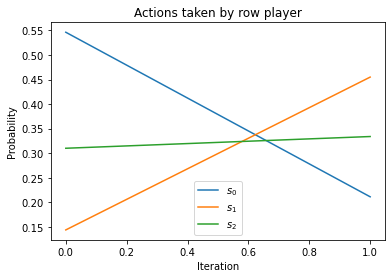

In [84]:
import matplotlib.pyplot as plt
plt.figure() 

probabilities = [n/iterations for n in play_counts[-1]]

for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number}$")  

    
    
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Actions taken by row player")  
plt.legend() 

این بار برای ماتریس های

A , B

همان الگوریتم قبلی را تکرار کنید و نشان دهید که این بار برای بازیکن دوم الگوریتم ها همگرا میشوند

[array([0.329, 0.332, 0.339]), array([0.3356, 0.3361, 0.3283])]


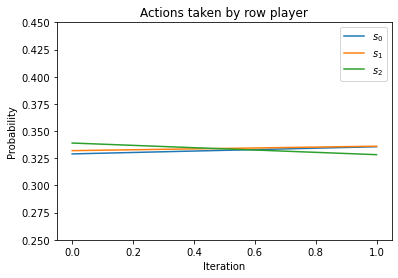

In [85]:
A = np.array([[1 / 2, 1, 0], [0, 1 / 2, 1], [1, 0, 1 / 2]])
B = np.array([[1 / 2, 0, 1], [1, 1 / 2, 0], [0, 1, 1 / 2]])
game = nash.Game(A, B)
np.random.seed(0)

iterations = 10000
play_counts2 = tuple(game.fictitious_play(iterations=iterations))

plt.figure() 
probabilities2 = [n/iterations for n in play_counts2[-1]]
print(probabilities2)

for number, strategy in enumerate(zip(*probabilities2)):
    plt.plot(strategy, label=f"$s_{number}$")  

    
    
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Actions taken by row player")
plt.ylim(0.25,0.45)
plt.legend() 

حال میخواهیم ببینیم یک بازیکن در گذر زمان چه احتمالی از استراتژی ها را بازی میکند.
 با استفاده از الگوریتم 

replicator dynamics

برای ماتریس های  هزینه َA,
این کار را انجام دهید.
( البته پیش از این کار همانند قسمت قبل 
احتمال هر استراتژی را برای بازیکن اول و دوم پلات بگیرید)

[[0.5        0.5       ]
 [0.49875032 0.50124968]
 [0.49750377 0.50249623]
 ...
 [0.10199196 0.89800804]
 [0.10189853 0.89810147]
 [0.10180527 0.89819473]]


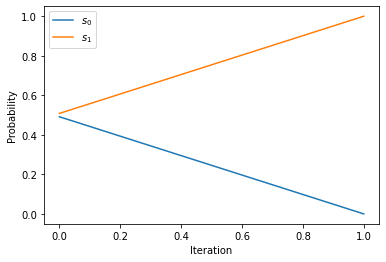

In [98]:
import nashpy as nash
import numpy as np

A = np.array([[3, 2], [4, 2]])
B = np.array([[1, 3], [2, 4]])
game = nash.Game(A,B)

np.random.seed(0)

iterations = 10000
play_counts3 = tuple(game.fictitious_play(iterations=iterations))

plt.figure() 
probabilities3 = [n/iterations for n in play_counts3[-1]]

for number, strategy in enumerate(zip(*probabilities3)):
    plt.plot(strategy, label=f"$s_{number}$")  

    
    
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.legend() 



RD_result = game.replicator_dynamics()
print(RD_result)